## Feature Selection

## Univariate Selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] 
y = data.iloc[:,-1]    

In [2]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)


In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
 featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [5]:
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [6]:
print(featureScores.nlargest(10,'Score'))  

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [8]:
print(model.feature_importances_) 

[0.05991253 0.02094929 0.03360469 0.02080074 0.0334896  0.01742973
 0.0365632  0.0342047  0.03694649 0.03388583 0.03394656 0.04793391
 0.04932438 0.38316893 0.03478258 0.03475595 0.03508698 0.0146031
 0.01818197 0.02042883]


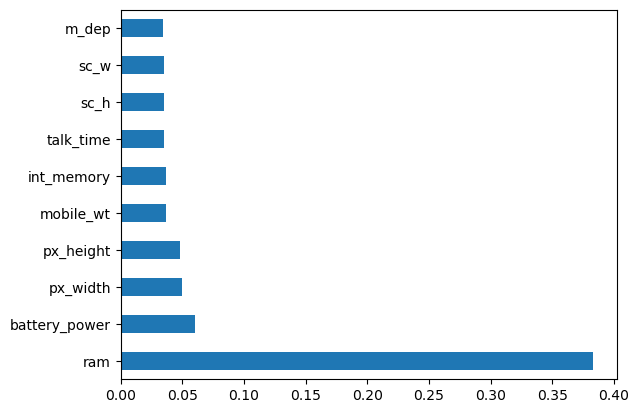

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

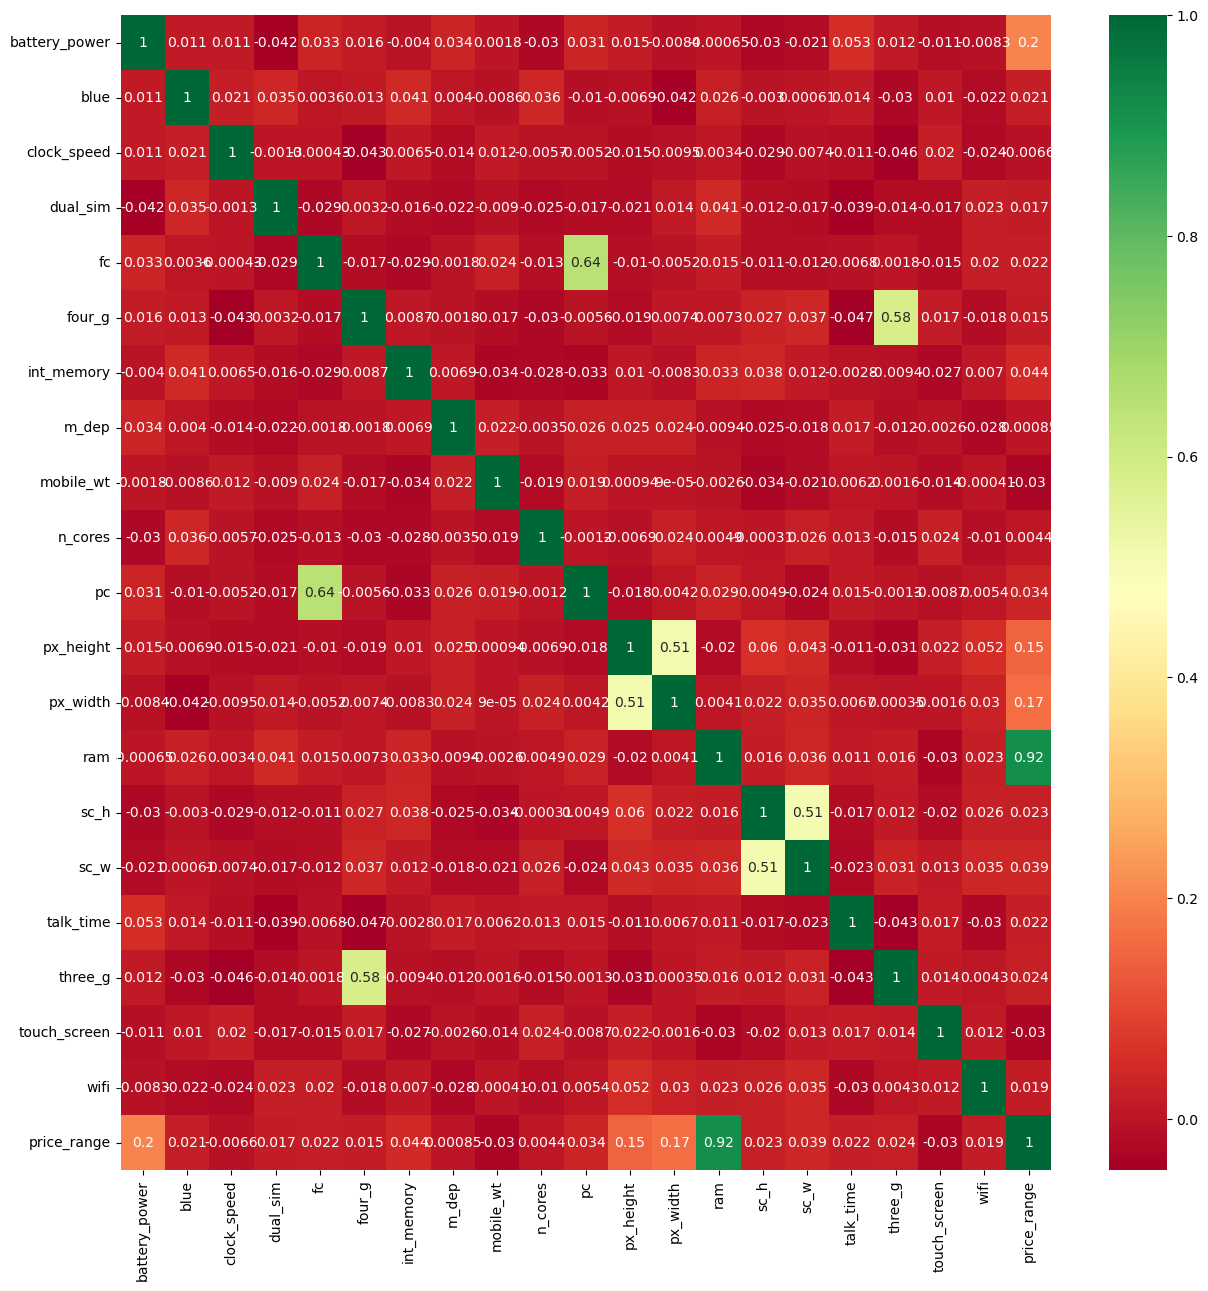

In [13]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")